# < 3주차 과제 1 : MLP 마음대로 다뤄보기>
- dataset을 임의로 선정해서 직접 분석 해보기(제공한 코드를 활용해서 해보기) : load_digits(), load_wine() 중 선택
- activation functions 중 relu사용시 함수 직접 정의
- 마음대로 바꿔보기
  + activation function
  + lr
  + optimizer
  + hidden layer/neuron 수 
- 전처리도 추가
- 모든 시도를 올려주세요!
- 제일 높은 acc를 보인 시도를 명시해주세요!




In [364]:
import torch
from torch import nn, optim
from sklearn.datasets import load_breast_cancer
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## 아래 데이터셋 중 원하는 데이터셋 하나를 선택하여, 코드 과제 진행하기!
- 1) load_digits() <br>
- 2) load_wine()

In [386]:
from sklearn.datasets import load_digits

In [387]:
# 데이터셋 종류 : load_digits()
data = load_digits()

In [388]:
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [389]:
input = data.data
output = data.target

In [369]:
#DF화
import pandas as pd
import numpy as np
d_data = data.data
d_target = data.target
d_df = pd.DataFrame(data = d_data, columns=[data.feature_names])
d_df['target'] = data.target
d_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [390]:
d_df['target'].value_counts().sort_index()

(target,)
0            178
1            182
2            177
3            183
4            181
5            182
6            181
7            179
8            174
9            180
dtype: int64

relu사용시 함수 직접 정의

In [391]:
def relu(x):
  return np.maximum(0, x)
def relu_prime(x):
  if x>0 :
    return 1
  else:
    return 0

In [392]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

In [393]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state = 42, stratify= data.target, shuffle = True)

x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)

# 데이터를 tensor로 바꿔주고 gpu 연산이 가능해지도록 gpu에 옮김
# label 값을 왜 long 에 옮겨놓는가? loss function이 다르기 때문 

CrossEntropyLoss 사용 시 target은 [torch.LongTensor](https://jdhao.github.io/2017/11/15/pytorch-datatype-note/) 이어야함.

**Tensor and scalar operation**

- FloatTensor: int/ float로 연산 가능(곱, 합, 나누기 등) 
- LongTensor: float가 아닌 int로 연산 가능.

**Why do some losses require target to be LongTensor?**

According to PyTorch developers, some use cases requires that the target be LongTensor type and int just can not hold the target value.

: 개발자가 그렇게 하래..

In [394]:
print(input.shape, output.shape)
print(x_train[0])
print(y_train[0])

#input 64개 (속성이 64개)
#y의 class는 10개 (0~9)

(1797, 64) (1797,)
tensor([ 0.,  0.,  0., 16., 12.,  1.,  0.,  0.,  0.,  0.,  6., 16., 14.,  7.,
         0.,  0.,  0.,  0., 14., 15.,  1., 11.,  0.,  0.,  0.,  0., 16., 15.,
         0., 14.,  1.,  0.,  0.,  1., 16., 10.,  0., 14.,  2.,  0.,  0.,  0.,
        15., 13.,  3., 15.,  3.,  0.,  0.,  0.,  9., 16., 16., 15.,  0.,  0.,
         0.,  0.,  0., 13., 16.,  8.,  0.,  0.], device='cuda:0')
tensor(0, device='cuda:0')


파이토치에서 데이터셋을 좀 더 쉽게 다룰 수 있도록 유용한 도구

: **torch.utils.data.Dataset**  ->  **torch.utils.data.DataLoader**
 
: 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있습니다. 

: 기본적인 사용 방법: Dataset을 정의하고, 이를 DataLoader에 전달하는 것
- init : class 에서 객체가 생성되면 바로 실행되는 함수
- len : observation 수를 정의하는 함수
- getitem : iteration 마다 해당하는 데이터를 돌려주는 함수

In [395]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train
    self.y_data = [[y] for y in y_train]
#  데이터셋의 전처리를 해주는 부분

  def __len__(self):
    return len(self.x_data)
#  데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)
#  데이터셋에서 특정 1개의 샘플을 가져오는 함수

    return x,y

# !batch_size

In [396]:
batch_size = 8
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size) 

In [218]:
# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까? 
# hidden layer/neuron 수를 바꾸기
# 1-1. 
model = nn.Sequential(
          nn.Linear(64,398, bias=True), 
          nn.Sigmoid(),
          nn.Linear(398,60, bias=True),
          nn.Sigmoid(),
          nn.Linear(60,30, bias=True), 
          nn.Sigmoid(),
          nn.Linear(30,10, bias=True),
          nn.Softmax()
          ).to(device)

In [231]:
# 1-2. 층 하나 줄이기
model = nn.Sequential(
          nn.Linear(64,398, bias=True), 
          nn.Sigmoid(),
          nn.Linear(398,30, bias=True),
          nn.Sigmoid(),
          nn.Linear(30,10, bias=True),
          nn.Softmax()
          ).to(device)

In [241]:
# 1-2-1. 층 뉴런 수 바꾸기(줄이기)
model = nn.Sequential(
          nn.Linear(64,150, bias=True), 
          nn.Sigmoid(),
          nn.Linear(250,30, bias=True),
          nn.Sigmoid(),
          nn.Linear(30,10, bias=True),
          nn.Softmax()
          ).to(device)

In [ ]:
# 1-2-2. 층 뉴런 수 바꾸기(줄이기)
model = nn.Sequential(
          nn.Linear(64,500, bias=True), 
          nn.Sigmoid(),
          nn.Linear(500,30, bias=True),
          nn.Sigmoid(),
          nn.Linear(30,10, bias=True),
          nn.Softmax()
          ).to(device)

In [397]:
# 1-2-2-1. 활성화함수 바꾸기(Relu)
model = nn.Sequential(
          nn.Linear(64,500, bias=True), 
          nn.ReLU(),
          nn.Linear(500,30, bias=True),
          nn.ReLU(),
          nn.Linear(30,10, bias=True),
          nn.Softmax()
          ).to(device)

In [282]:
# 1-3.활성화 함수 바꾸기(ReLu)
model = nn.Sequential(
          nn.Linear(64,398, bias=True), 
          nn.ReLU(),
          nn.Linear(398,60, bias=True),
          nn.ReLU(),
          nn.Linear(60,30, bias=True), 
          nn.ReLU(),
          nn.Linear(30,10, bias=True),
          nn.Softmax()
          ).to(device)

class로 구현 가능
- init : 초기 생성 함수
- foward : 순전파(입력값 => 예측값 의 과정)

#!모델(히든레이어/뉴런 수)

In [219]:
# 1-1 
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(64,398, bias=True), # input_layer = 64, hidden_layer1 = 398 
          nn.Sigmoid(),
        nn.BatchNorm1d(398)
    )
    self.layer2 = nn.Sequential(
          nn.Linear(398,60, bias=True), # hidden_layer1 = 398, hidden_layer2 = 60
        nn.Sigmoid()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(60,30, bias=True), # hidden_layer2 = 60, hidden_layer3 = 30
        nn.Sigmoid()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(30, 10, bias=True), # hidden_layer3 = 30, output_layer = 10
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [232]:
# 1-2. 층 하나 줄이기
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(64,398, bias=True), # input_layer = 64, hidden_layer1 = 398 
          nn.Sigmoid(),
        nn.BatchNorm1d(398)
    )
    self.layer2 = nn.Sequential(
          nn.Linear(398,30, bias=True), # hidden_layer1 = 398, hidden_layer2 = 30
        nn.Sigmoid()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(30,10, bias=True), # hidden_layer2 = 30, output_layer = 10
        nn.Sigmoid()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    return output

In [242]:
# 1-2-1. 층  뉴런 수 바꾸기(줄이기)
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(64,150, bias=True), # input_layer = 64, hidden_layer1 = 150
          nn.Sigmoid(),
        nn.BatchNorm1d(150)
    )
    self.layer2 = nn.Sequential(
          nn.Linear(150,30, bias=True), # hidden_layer1 = 150, hidden_layer2 = 30
        nn.Sigmoid()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(30,10, bias=True), # hidden_layer2 = 30, output_layer = 10
        nn.Sigmoid()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    return output

In [251]:
# 1-2-2. 층  뉴런 수 바꾸기(늘이기)
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(64,500, bias=True), # input_layer = 64, hidden_layer1 = 500
          nn.Sigmoid(),
        nn.BatchNorm1d(500)
    )
    self.layer2 = nn.Sequential(
          nn.Linear(500,30, bias=True), # hidden_layer1 = 500, hidden_layer2 = 30
                  nn.Sigmoid()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(30,10, bias=True), # hidden_layer1 = 30, output_layer = 30
        nn.Sigmoid()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    return output

In [398]:
# 1-2-2-1. 활성화함수 바꾸기(ReLu)
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(64,500, bias=True), # input_layer = 64, hidden_layer1 = 500
          nn.ReLU(),
        nn.BatchNorm1d(500)
    )
    self.layer2 = nn.Sequential(
          nn.Linear(500,30, bias=True), # hidden_layer1 = 500, hidden_layer2 = 30
                  nn.ReLU()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(30,10, bias=True), # hidden_layer1 = 30, output_layer = 30
        nn.ReLU()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    return output

In [283]:
# 1-3. 활성화함수 바꾸기(ReLu)
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(64,398, bias=True), # input_layer = 64, hidden_layer1 = 398 
          nn.ReLU(),
        nn.BatchNorm1d(398)
    )
    self.layer2 = nn.Sequential(
          nn.Linear(398,60, bias=True), # hidden_layer1 = 398, hidden_layer2 = 60
        nn.ReLU()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(60,30, bias=True), # hidden_layer2 = 60, hidden_layer3 = 30
        nn.ReLU()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(30, 10, bias=True), # hidden_layer3 = 30, output_layer = 10
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [399]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [400]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-399-6196a47a4462>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=64, out_features=500, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=500, out_features=30, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=30, out_features=10, bias=True)
    (1): ReLU()
  )
)

In [401]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=64, out_features=500, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=500, out_features=30, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=30, out_features=10, bias=True)
    (1): ReLU()
  )
)


#!옵티마이저

In [305]:
# 기존 옵티마이저
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


optimizer = optim.Adam(model.parameters(), lr= 0.01)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

# sgd 등등

In [359]:
#1-2-2-1-a. 옵티마이저 바꾸기(Adam 0.001)
loss_fn  = nn.CrossEntropyLoss().to(device)

optimizer = optim.Adam(model.parameters(), lr= 0.01)

In [320]:
#1-2-2-1-b(1). 옵티마이저 바꾸기(Adagrad 0.01)
loss_fn  = nn.CrossEntropyLoss().to(device)

optimizer = optim.Adagrad(model.parameters(), lr= 0.01)

In [341]:
#1-2-2-1-b(2). 옵티마이저 바꾸기(Adagrad 0.001)
loss_fn  = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adagrad(model.parameters(), lr= 0.001)

In [381]:
#1-2-2-1-c(1). 옵티마이저 바꾸기(SGD 0.01)
loss_fn  = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [402]:
#1-2-2-1-c(2). 옵티마이저 바꾸기(SGD 0.01)
loss_fn  = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [403]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

0 2.43400502204895
10 2.0951039791107178
20 1.6457127332687378
30 1.3139327764511108
40 1.061397910118103
50 0.8710430860519409
60 0.7188907265663147
70 0.5941457748413086
80 0.4970013499259949
90 0.42252248525619507


In [404]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

##### batch_size=8

# 1 기존 baseline
3 hidden(398, 60, 30) + Sigmoid 활성화 함수

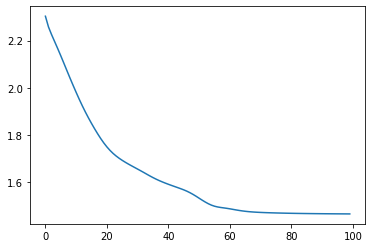

In [226]:
plt.plot(losses)
plt.show()

In [227]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [1.7202537e-03 9.9355257e-01 3.9423723e-04 1.4508226e-04 1.7301072e-03
 3.4719653e-04 9.1791888e-05 5.3268520e-04 9.8394579e-04 5.0222385e-04]
argmax를 한 후의 output은 1
accuracy는 0.9833333333333333


## 1-2. 층 하나 줄이기
2 hidden(398, 30) + Sigmoid 활성화 함수

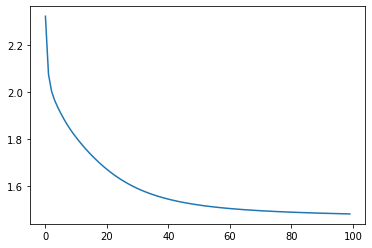

In [240]:
plt.plot(losses)
plt.show()

In [239]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [0.00365305 0.98859197 0.00788808 0.00468231 0.00834613 0.02571318
 0.0155115  0.01803498 0.02628222 0.02364821]
argmax를 한 후의 output은 1
accuracy는 0.9833333333333333


### 1-2-1. 층 뉴런 수 바꾸기(줄이기)

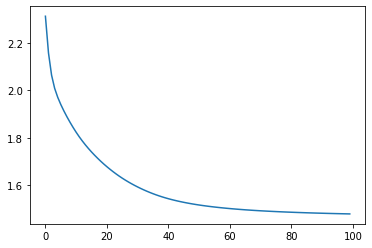

In [250]:
plt.plot(losses)
plt.show()

In [249]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [0.00947441 0.99182457 0.00881015 0.01153589 0.02684061 0.00286122
 0.01517433 0.01179624 0.00450912 0.02889114]
argmax를 한 후의 output은 1
accuracy는 0.9814814814814815


### 1-2-2. 층 뉴런 수 바꾸기(늘이기)

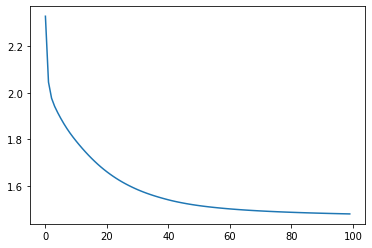

In [258]:
plt.plot(losses)
plt.show()

In [259]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [0.01636683 0.9904635  0.01630913 0.01253727 0.03101692 0.00511077
 0.00831614 0.03002642 0.01351622 0.01288398]
argmax를 한 후의 output은 1
accuracy는 0.9851851851851852


#### 1-2-2-1. 활성화 함수 바꾸기(ReLu)

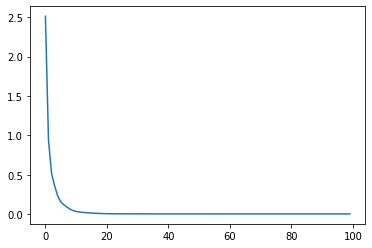

In [280]:
plt.plot(losses)
plt.show()

In [281]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [ 0.        18.092043   2.8417935  0.         0.         8.760982
  0.         0.         1.1731486  0.       ]
argmax를 한 후의 output은 1
accuracy는 0.9851851851851852


##### 💯 1-2-2-1-a.옵티마이저(학습률) 바꾸기(Adam 0.001)


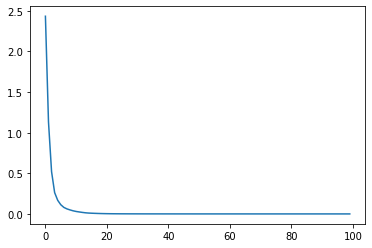

In [362]:
plt.plot(losses)
plt.show()

In [363]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [ 0.        21.773655   5.800887   0.         0.         0.
  5.7476683  0.         0.         6.91699  ]
argmax를 한 후의 output은 1
accuracy는 0.9888888888888889


##### 1-2-2-1-b(1). 옵티마이저 바꾸기(Adagrad 0.01)

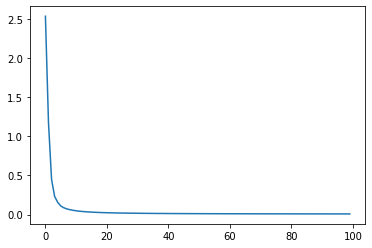

In [323]:
plt.plot(losses)
plt.show()

In [324]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [0.        8.436815  0.5574618 0.        0.        0.        0.
 0.        0.        2.4941719]
argmax를 한 후의 output은 1
accuracy는 0.9796296296296296


##### 1-2-2-1-b(2). 옵티마이저 바꾸기(Adagrad 0.001)

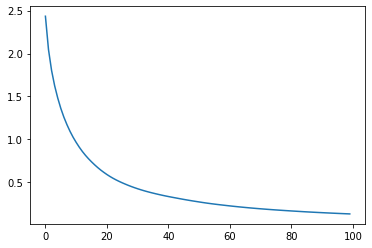

In [344]:
plt.plot(losses)
plt.show()

In [345]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [0.        5.2973833 2.7224443 0.        0.        0.        2.3633564
 0.        0.        0.       ]
argmax를 한 후의 output은 1
accuracy는 0.9592592592592593


##### 1-2-2-1-c(1). 옵티마이저 바꾸기(SGD 0.01)

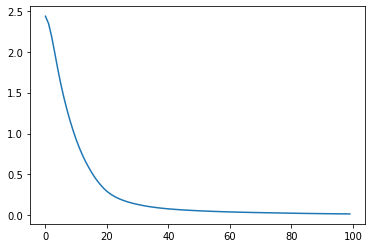

In [384]:
plt.plot(losses)
plt.show()

In [385]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [0.        7.5738916 3.5013888 0.5965001 0.        0.        1.9200389
 0.        0.        1.6492908]
argmax를 한 후의 output은 1
accuracy는 0.9703703703703703


##### 1-2-2-1-c(2). 옵티마이저 바꾸기(SGD 0.001)

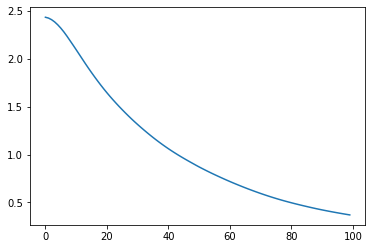

In [405]:
plt.plot(losses)
plt.show()

In [406]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [0.         2.3399363  1.7269936  0.04952826 0.         0.
 1.9267641  0.         0.         0.        ]
argmax를 한 후의 output은 1
accuracy는 0.9037037037037037


## 1-3. 활성화 함수 바꾸기(ReLU)

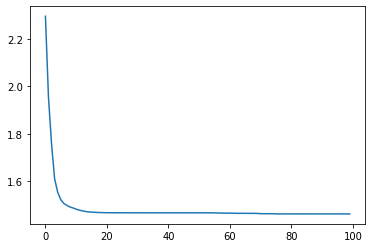

In [291]:
plt.plot(losses)
plt.show()

In [290]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [8.4143939e-30 1.0000000e+00 1.8870449e-18 2.0617633e-20 2.7918450e-23
 6.2566297e-10 2.9173070e-20 3.7665000e-28 6.2837741e-15 4.5830321e-13]
argmax를 한 후의 output은 1
accuracy는 0.9740740740740741


### batch_size=15

In [146]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [8.9327823e-06 9.9640191e-01 6.1166109e-05 1.1068328e-04 1.3630840e-04
 6.9481792e-04 1.0783077e-03 1.3044401e-04 1.3184415e-03 5.8942198e-05]
argmax를 한 후의 output은 1
accuracy는 0.9851851851851852


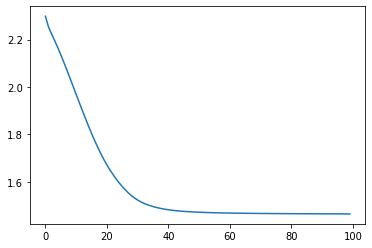

In [144]:
plt.plot(losses)
plt.show()

### batch_size=20

In [135]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [1.5507243e-03 9.9582028e-01 6.1887573e-04 1.5244079e-04 2.9674661e-04
 7.2145398e-04 2.0018584e-05 6.6574034e-04 1.4304733e-04 1.0668883e-05]
argmax를 한 후의 output은 1
accuracy는 0.9814814814814815


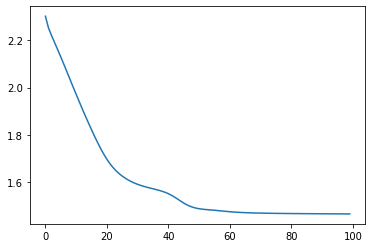

In [157]:
plt.plot(losses)
plt.show()

### batch_size= 100

In [124]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [1.0805618e-04 9.9758911e-01 9.5929507e-05 3.8707312e-05 1.4657037e-04
 1.8043531e-04 3.5024914e-05 5.9061835e-04 1.0809489e-03 1.3457071e-04]
argmax를 한 후의 output은 1
accuracy는 0.9796296296296296


In [182]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [1.0896160e-04 9.9696380e-01 5.9117231e-04 1.5468025e-04 3.8330072e-05
 5.3152733e-05 1.2024674e-03 1.9882963e-04 6.1159732e-04 7.7100536e-05]
argmax를 한 후의 output은 1
accuracy는 0.9907407407407407


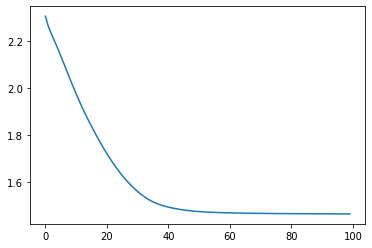

In [181]:
plt.plot(losses)
plt.show()

batch_size 조정 시 때마다 달라짐. 다른 조정값의 변화의 의미 파악이 어려워짐

# < 3주차 과제 2 : CNN 맛보기>
- Part 1에서 수행했던 모델과 어떤 점이 달라졌는지 확인해주세요
- 코드를 직접 필사 해보시길 바랍니다.















In [1]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [2]:
# Training settings

batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



[**Conv2d**](https://blog.joonas.io/196?category=1016329)(

  **in_channels**,  #입력 채널 수(흑백 이미지=1 / RGB 이미지=3)

  **out_channels**, #out_channels 만큼의 필터링 결과 뽑아냄. ⏰내부적인 필터 개수는 잘 모르겟/이게 필터 개수인건가

  kernel_size,  #필터의 사이즈

  stride=1, 

  padding=0)

: 2차원 배열 data에 사용 (이미지 분류에서 많이 사용)





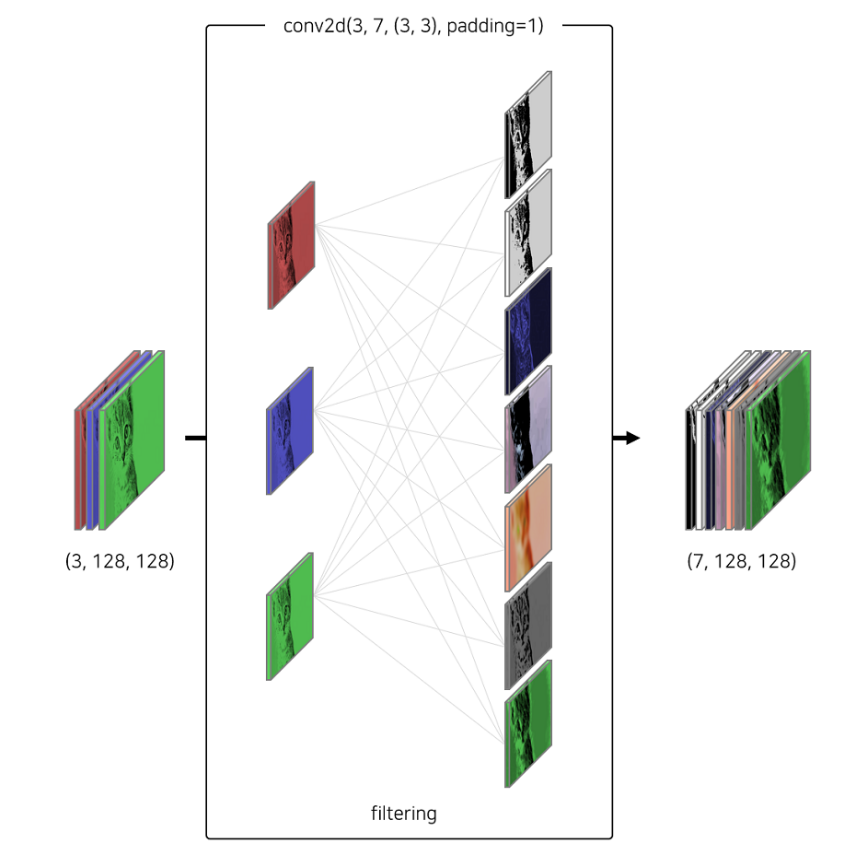

[MNIST 예제를 통한 Keras, PyTorch 비교](https://yong0810.tistory.com/19)

In [3]:
class Net(nn.Module):
  def __init__(self): 
    super(Net, self).__init__()
    # input size = 28x28
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)  # 흑백 사진이니까 in_channels = 1// 10개의 out channel 출력// 5*5 필터로. -> 28-(5-1)= 24. 10개의 24x24 output
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5) 
    self.mp = nn.MaxPool2d(2) #겹치는 부분 없이 이동
    self.fc = nn.Linear(320 , 10) ### : 알맞는 input은? 
    # nn.Linear(input_dim,output_dim)

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x))) #(conv1) 24x24 -> (relu) -> (MaxPool2d) : 12x12 .10개 
    x = F.relu(self.mp(self.conv2(x))) #(conv2) (12-4) 8x8 -> (relu) -> (Max)  : 4x4 .20개
    x = x.view(in_size, -1) #flatten to Linear에 집어넣기
    x = self.fc(x) # 4x4x20 = 320
    return F.log_softmax(x)

In [4]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [5]:
def train(epoch):
  model.train() #train mode: dropout 이나 batch_normalization 이용
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

In [6]:
def test():
    model.eval() #model.eval() 의 기능은?  
                 #evaluate mode로 전환: dropout 이나 batch_normalization 해제 
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        # volatile=True 옵션은 backprop은 하지 않고 forward prop만 할 때 사용
        # forward prop을 하면서 지나간 모든 layer들에 있는 activation 값들을 따로 저장하지 않음.

        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        
        
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

[**Nll_loss 와 Cross entropy loss와의 관계**](https://supermemi.tistory.com/entry/Loss-Cross-Entropy-Negative-Log-Likelihood-%EB%82%B4%EC%9A%A9-%EC%A0%95%EB%A6%AC-Pytorch-Code)

CrossEntropyLoss : LogSoftmax + NegLogLikelihoodLoss가 함께 사용
- CEL 안에서 LogSoftMax 와 NLL 적용됨.
- 즉, 해당 손실함수 적용한 **모델**엔 SoftMax나 log함수 존재 x
- 모델의 마지막 layer에 SoftMax 존재할 경우 -> NLLLoss 사용
 
 + model(NO softmax) -> CEL(softmax, NLL)
 + model(Yes softmax) -> NLL (CEL 안의 softmax가 모델에서 이미 진행됨)

In [7]:
for epoch in range(1, 10):
    train(epoch)
    test()

<built-in method size of Tensor object at 0x7fca066ef540>
<built-in method size of Tensor object at 0x7fca066ef400>
<built-in method size of Tensor object at 0x7fca066ef4a0>
<built-in method size of Tensor object at 0x7fca066ef3b0>


<ipython-input-3-ff92cff9787b>:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303159
<built-in method size of Tensor object at 0x7fca066f80e0>
<built-in method size of Tensor object at 0x7fca066f8180>
<built-in method size of Tensor object at 0x7fca066f8130>
<built-in method size of Tensor object at 0x7fca066f8220>
<built-in method size of Tensor object at 0x7fca066ef630>
<built-in method size of Tensor object at 0x7fca066ef860>
<built-in method size of Tensor object at 0x7fca066ef220>
<built-in method size of Tensor object at 0x7fca066efc20>
<built-in method size of Tensor object at 0x7fca066f82c0>
<built-in method size of Tensor object at 0x7fca066f80e0>
<built-in method size of Tensor object at 0x7fca066f8680>
<built-in method size of Tensor object at 0x7fca066f8400>
<built-in method size of Tensor object at 0x7fca066efa40>
<built-in method size of Tensor object at 0x7fca066ef630>
<built-in method size of Tensor object at 0x7fca066ef5e0>
<built-in method size of Tensor object at 0x7fca066efb30>
<built-in method size of Te

<ipython-input-6-f52337105c2a>:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
<built-in method size of Tensor object at 0x7fca0729c130>
<built-in method size of Tensor object at 0x7fca066f8130>
<built-in method size of Tensor object at 0x7fca066f8400>
<built-in method size of Tensor object at 0x7fca066f8220>
<built-in method size of Tensor object at 0x7fca066edf40>
<built-in method size of Tensor object at 0x7fca066edd60>
<built-in method size of Tensor object at 0x7fca066edc70>
<built-in method size of Tensor object at 0x7fca066edef0>
<built-in method size of Tensor object at 0x7fca071f2590>
<built-in method size of Tensor object at 0x7fca071f2310>
<built-in method size of Tensor object at 0x7fca071f2950>
<built-in method size of Tensor object at 0x7fca071f2180>
<built-in method size of Tensor object at 0x7fca066ef9a0>
<built-in method size of Tensor object at 0x7fca066eff40>
<built-in method size of Tensor object at 0x7fca066ef900>
<built-in method size of Tensor object at 0x7fca066efd60>
<built-in method size of Tensor obje